In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Step 2: Load the dataset
df = pd.read_csv("housing_data.csv")  # Adjust path if needed
df.head()


,id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [3]:
# Check missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_cleaned = df.drop(columns=[col for col in missing_values.index if df[col].isnull().sum() > threshold])

# Drop remaining missing values
df_cleaned = df_cleaned.dropna()

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Check structure after cleaning
df_cleaned.info()


Missing values:
 Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1378 non-null   int64  
 1   MSSubClass     1378 non-null   object 
 2   MSZoning       1378 non-null   object 
 3   LotFrontage    1378 non-null   int64  
 4   LotArea        1378 non-null   int64  
 5   Street         1378 non-null   object 
 6   LotShape       1378 non-null   object 
 7   LandContour    1378 non-null   object 
 8   Utilities      1378 non-null   object 
 9   LotConfig      1378 non-null   object 
 10  LandSlope      1378 non-null   object 
 11  Neighborhood   1378 non-null   object 
 12  Condition1     1378 non-null   object 
 13  Condition2     1378 non-null   object 
 14  BldgType       1378 non-null   object 
 15  HouseStyle     1378 non-null   obje

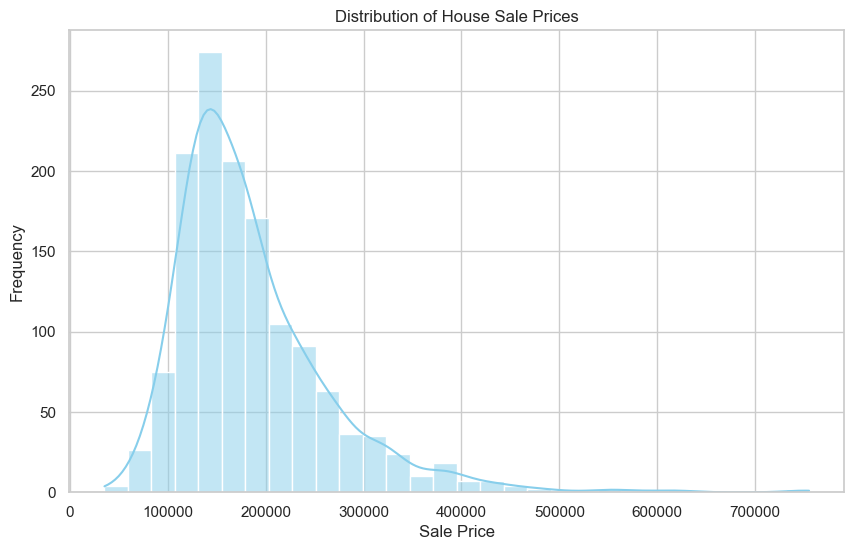

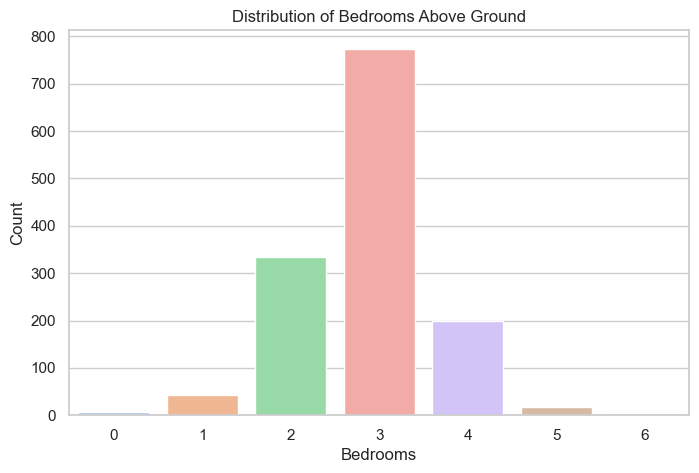

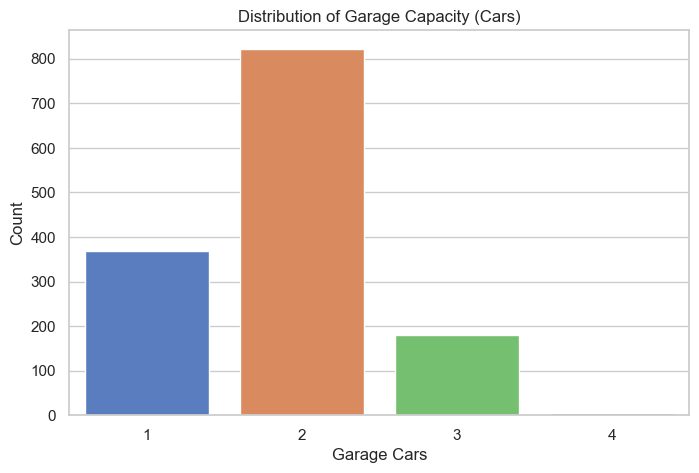

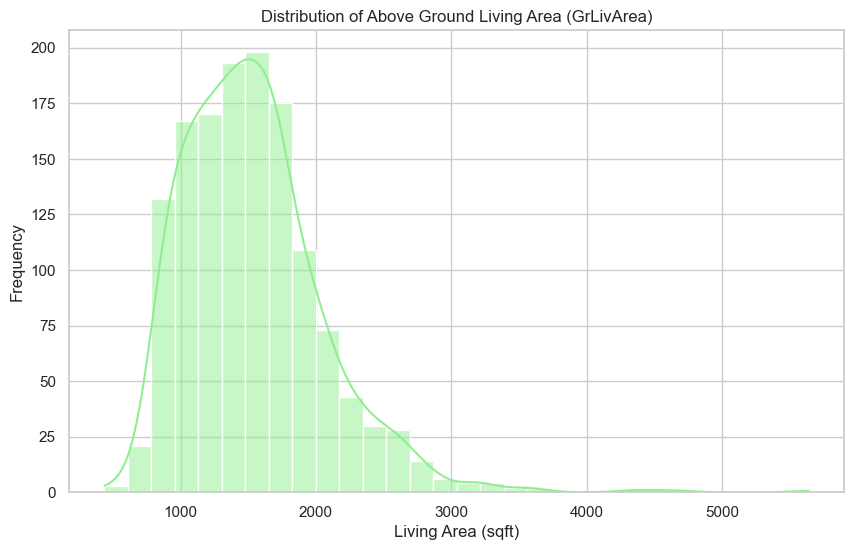

In [5]:
# 1. Distribution of House Prices
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['SalePrice'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# 2. Count of Bedrooms Above Ground
plt.figure(figsize=(8,5))
sns.countplot(x='BedroomAbvGr', data=df_cleaned, palette='pastel')
plt.title('Distribution of Bedrooms Above Ground')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

# 3. Count of Garage Cars
plt.figure(figsize=(8,5))
sns.countplot(x='GarageCars', data=df_cleaned, palette='muted')
plt.title('Distribution of Garage Capacity (Cars)')
plt.xlabel('Garage Cars')
plt.ylabel('Count')
plt.show()

# 4. Distribution of Living Area
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['GrLivArea'], kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Above Ground Living Area (GrLivArea)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Frequency')
plt.show()


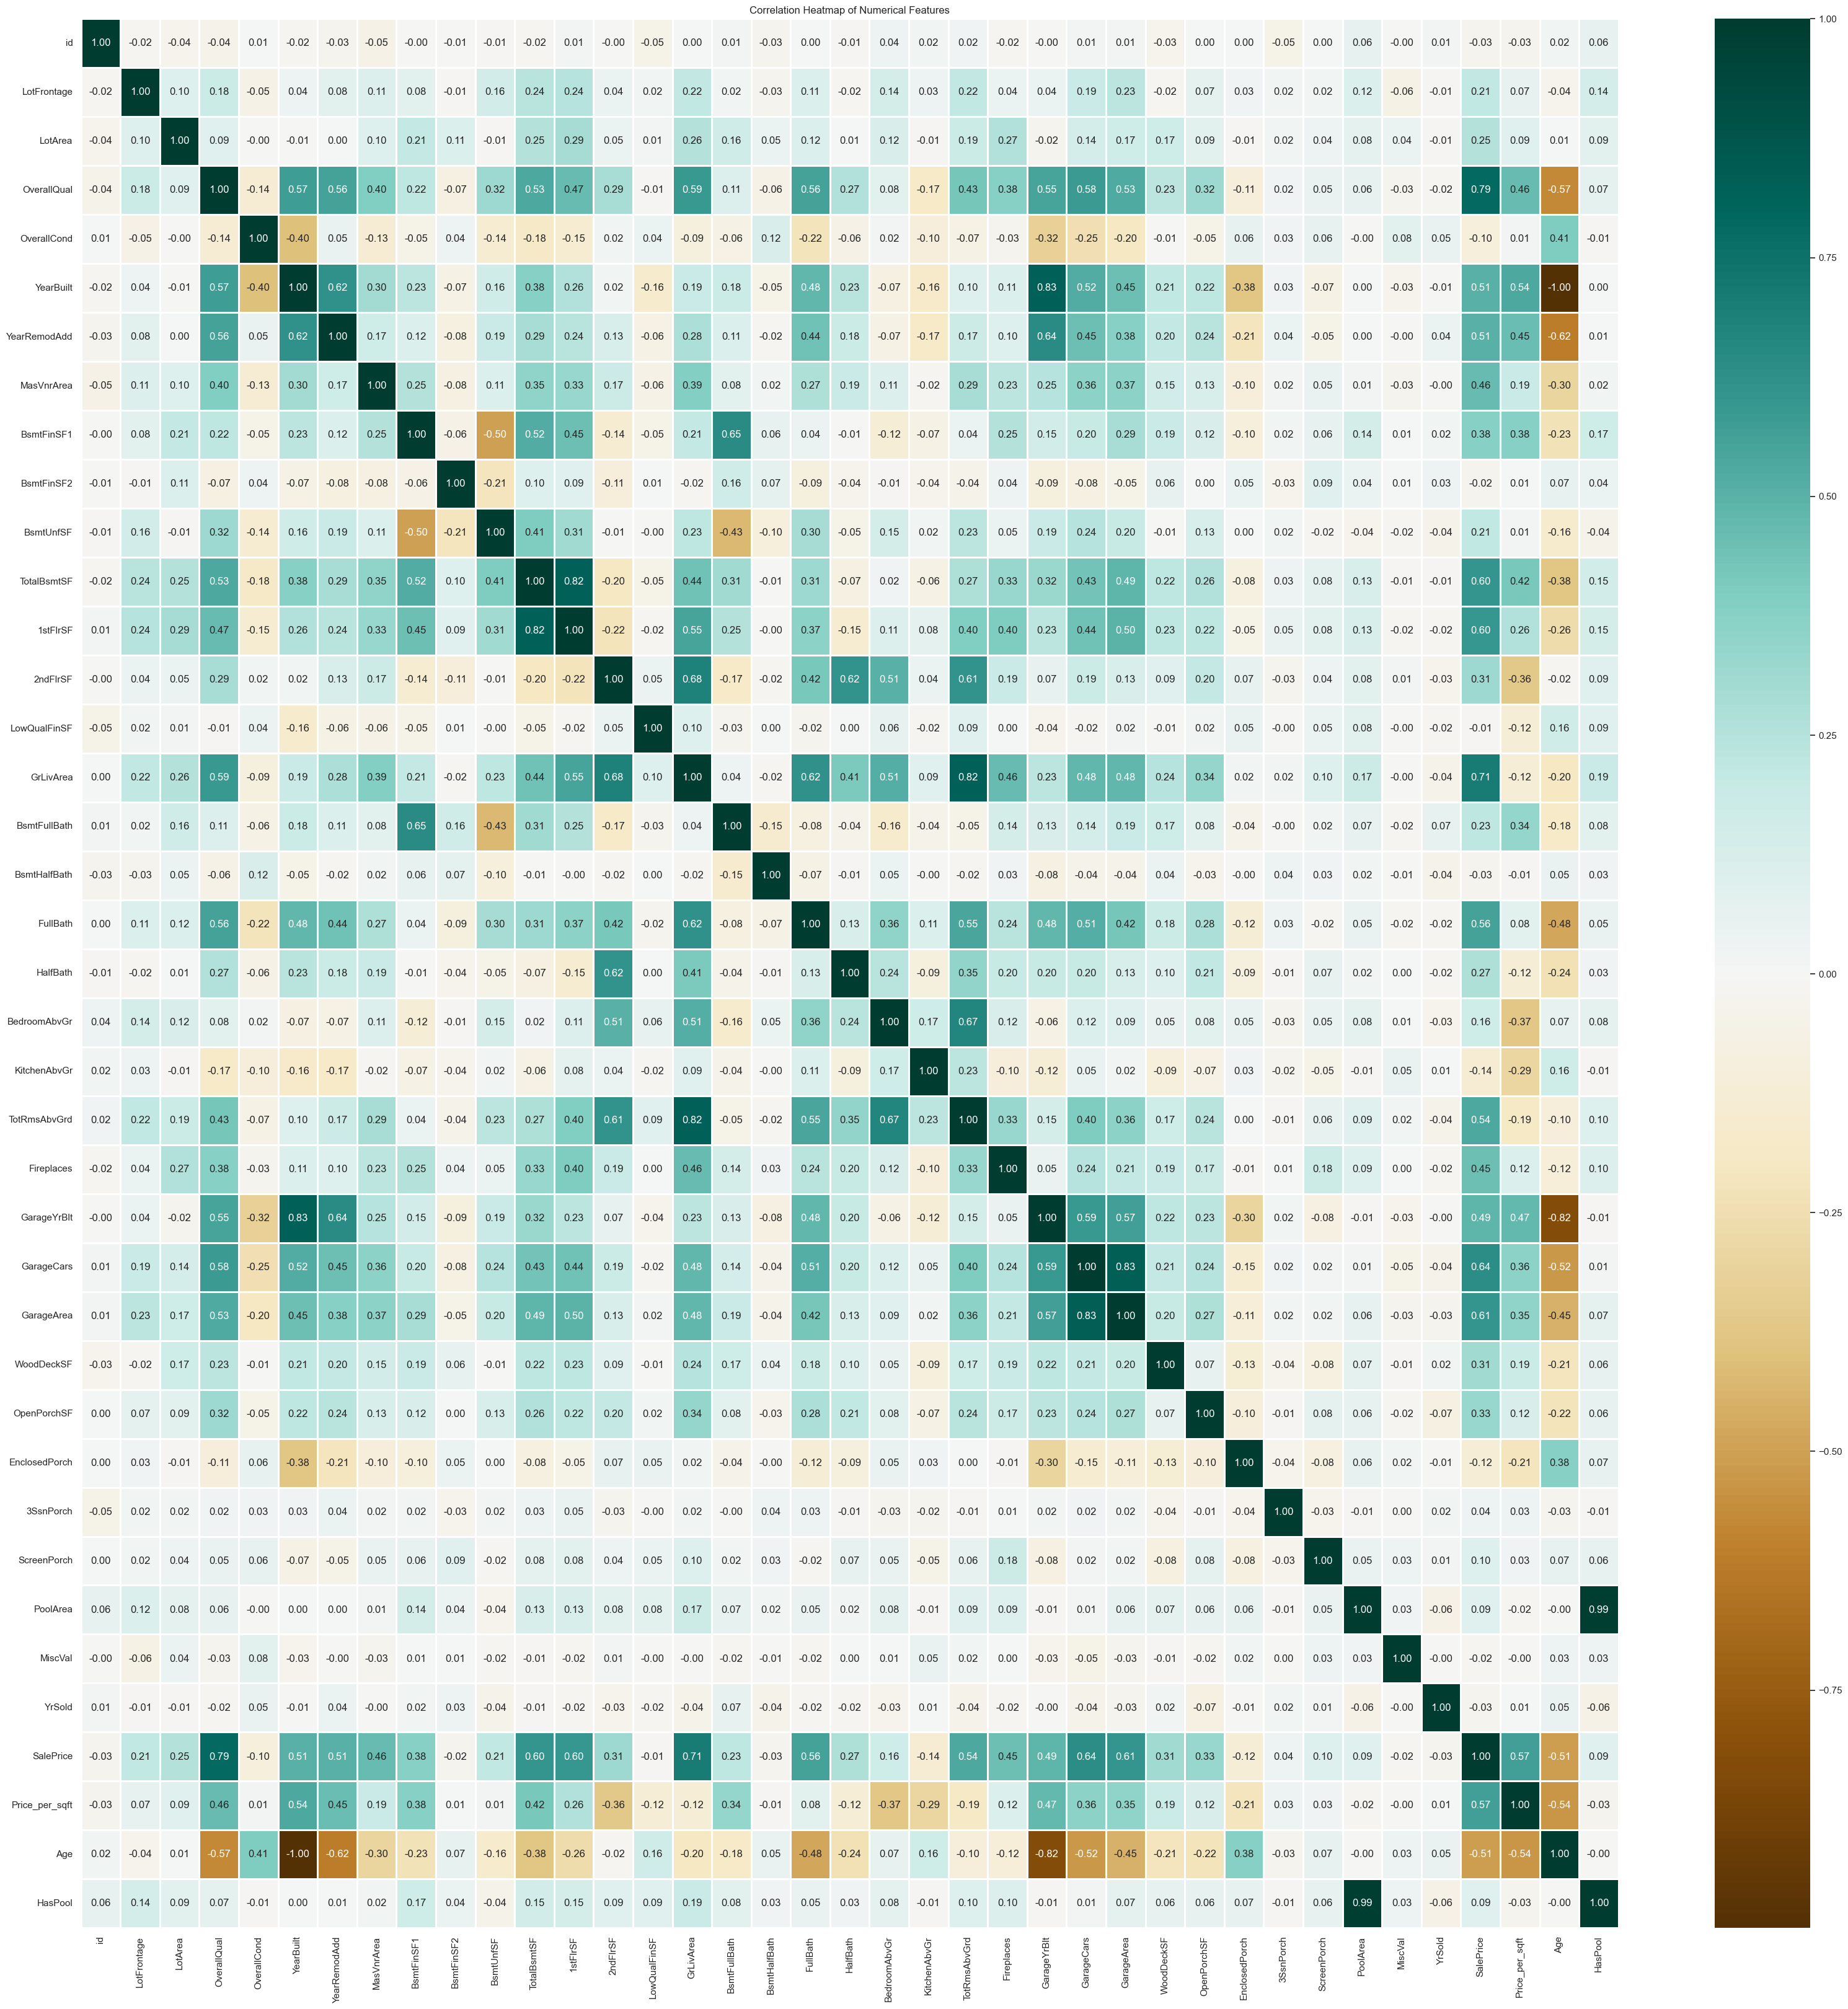

In [43]:
# Select only numerical columns
numerical_data = df_cleaned.select_dtypes(include=['number'])

# 1. Correlation Heatmap
plt.figure(figsize=(40,40))
sns.heatmap(numerical_data.corr(), cmap='BrBG', fmt='.2f', linewidths=1, annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


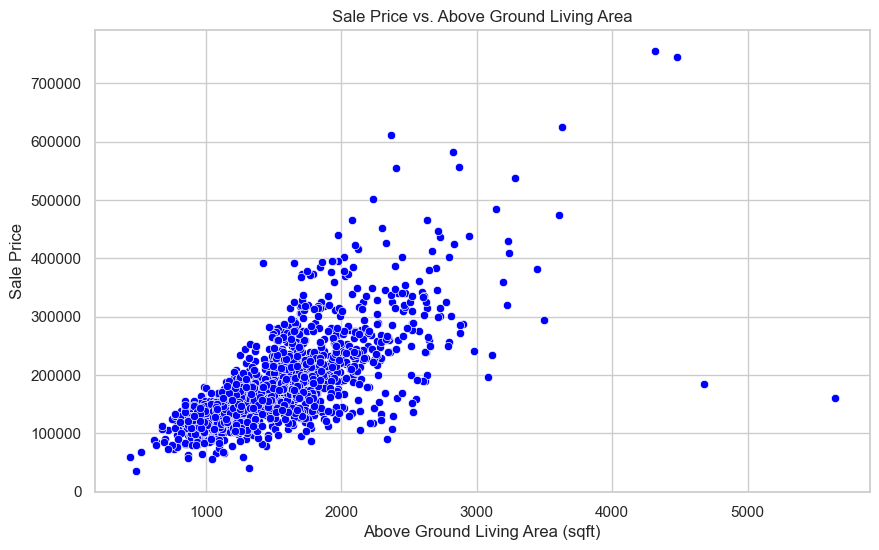

In [38]:
# 2. Scatter Plot: GrLivArea vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned, color='blue')
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sqft)')
plt.ylabel('Sale Price')
plt.show()


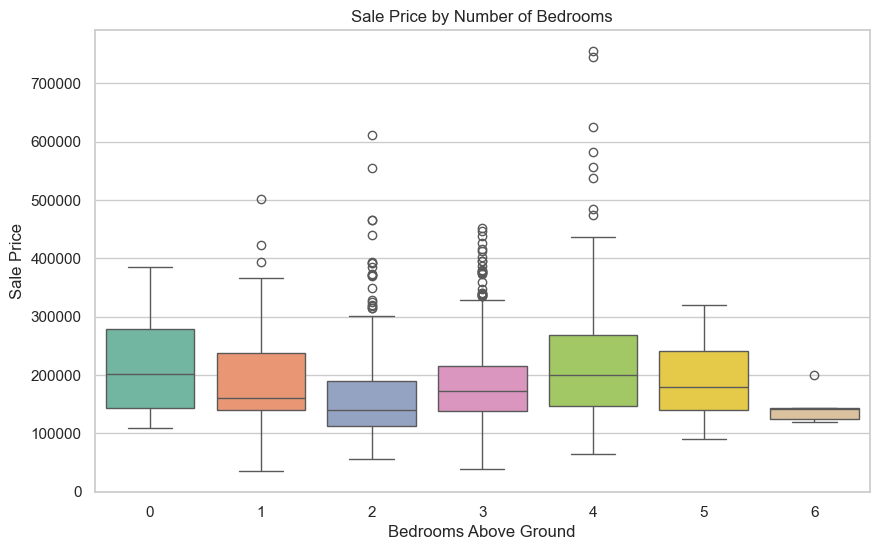

In [11]:
# 3. Boxplot: SalePrice vs Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df_cleaned, palette='Set2')
plt.title('Sale Price by Number of Bedrooms')
plt.xlabel('Bedrooms Above Ground')
plt.ylabel('Sale Price')
plt.show()


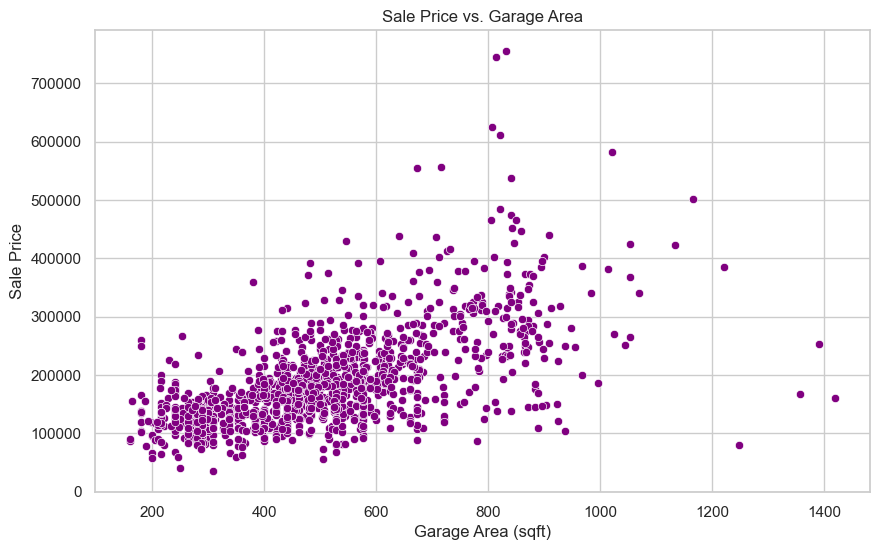

In [13]:
# 4. Scatter Plot: GarageArea vs SalePrice
plt.figure(figsize=(10,6))
sns.scatterplot(x='GarageArea', y='SalePrice', data=df_cleaned, color='purple')
plt.title('Sale Price vs. Garage Area')
plt.xlabel('Garage Area (sqft)')
plt.ylabel('Sale Price')
plt.show()


In [15]:
# 1. Price per Square Foot
df_cleaned['Price_per_sqft'] = df_cleaned['SalePrice'] / df_cleaned['GrLivArea']

# 2. House Age
df_cleaned['Age'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']

# Display the new features
df_cleaned[['GrLivArea', 'SalePrice', 'Price_per_sqft', 'YearBuilt', 'YrSold', 'Age']].head()


,GrLivArea,SalePrice,Price_per_sqft,YearBuilt,YrSold,Age
0,1710,208500,121.929825,2003,2008,5
1,1262,181500,143.819334,1976,2007,31
2,1786,223500,125.139978,2001,2008,7
3,1717,140000,81.537566,1915,2006,91
4,2198,250000,113.739763,2000,2008,8


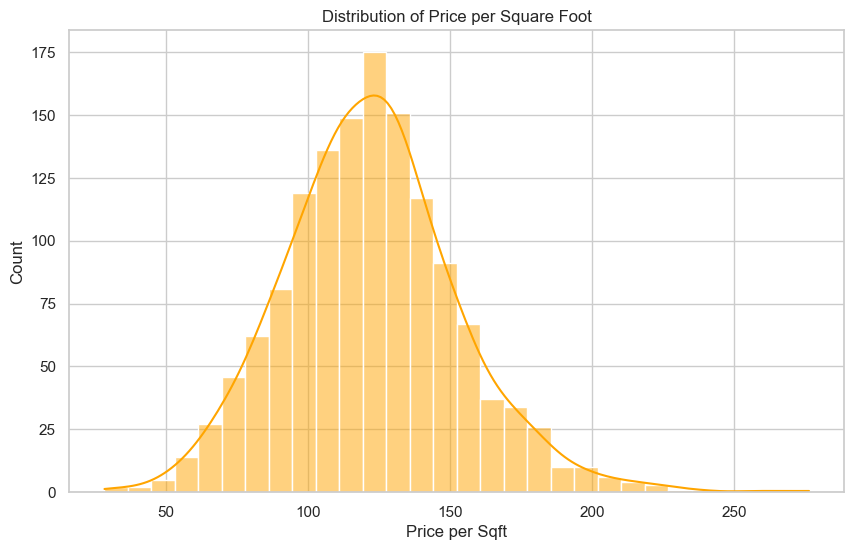

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['Price_per_sqft'], bins=30, kde=True, color='orange')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.show()


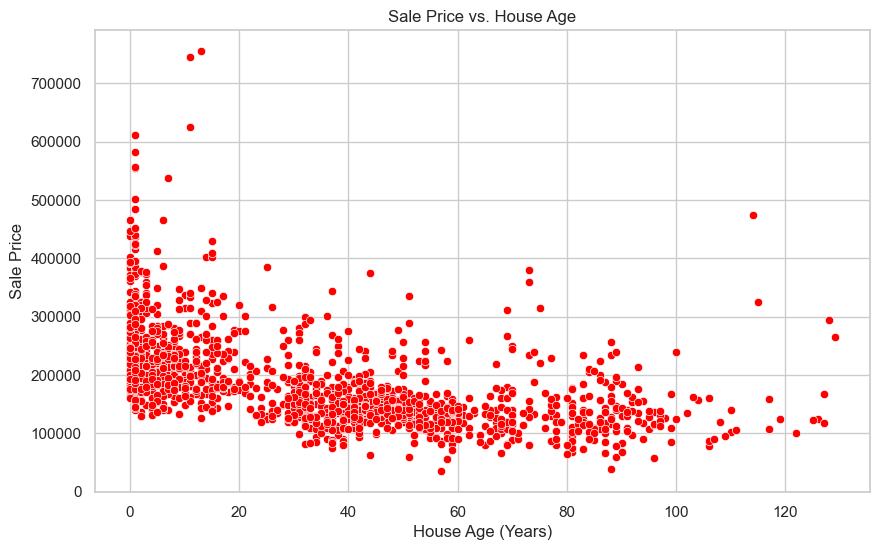

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='SalePrice', data=df_cleaned, color='red')
plt.title('Sale Price vs. House Age')
plt.xlabel('House Age (Years)')
plt.ylabel('Sale Price')
plt.show()


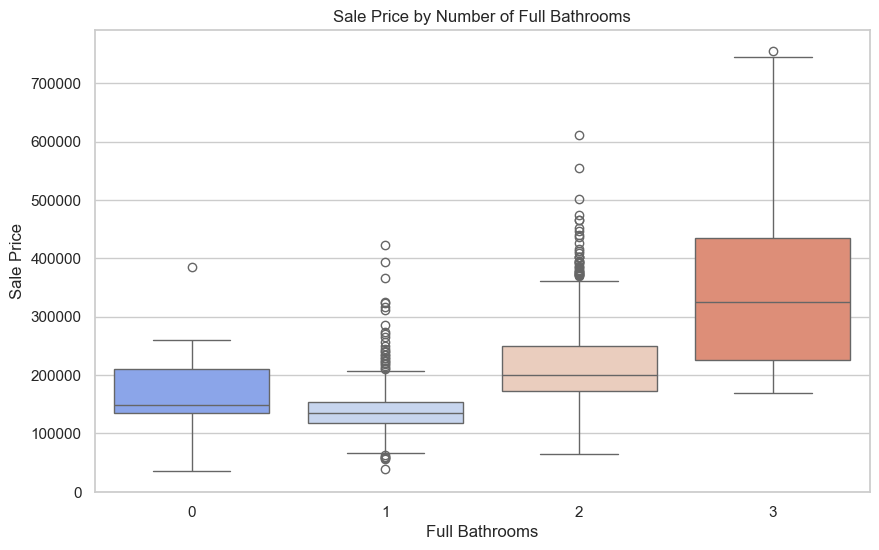

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='FullBath', y='SalePrice', data=df_cleaned, palette='coolwarm')
plt.title('Sale Price by Number of Full Bathrooms')
plt.xlabel('Full Bathrooms')
plt.ylabel('Sale Price')
plt.show()


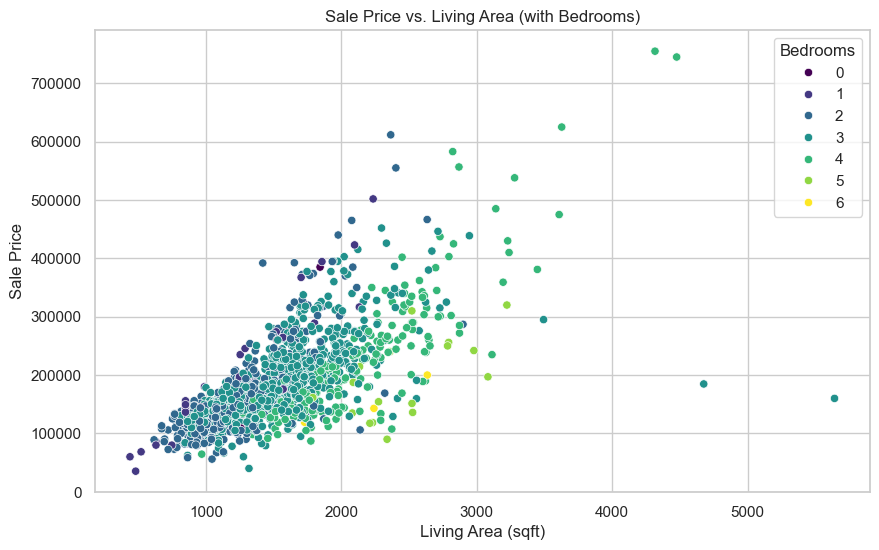

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='BedroomAbvGr', data=df_cleaned, palette='viridis')
plt.title('Sale Price vs. Living Area (with Bedrooms)')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Sale Price')
plt.legend(title='Bedrooms')
plt.show()


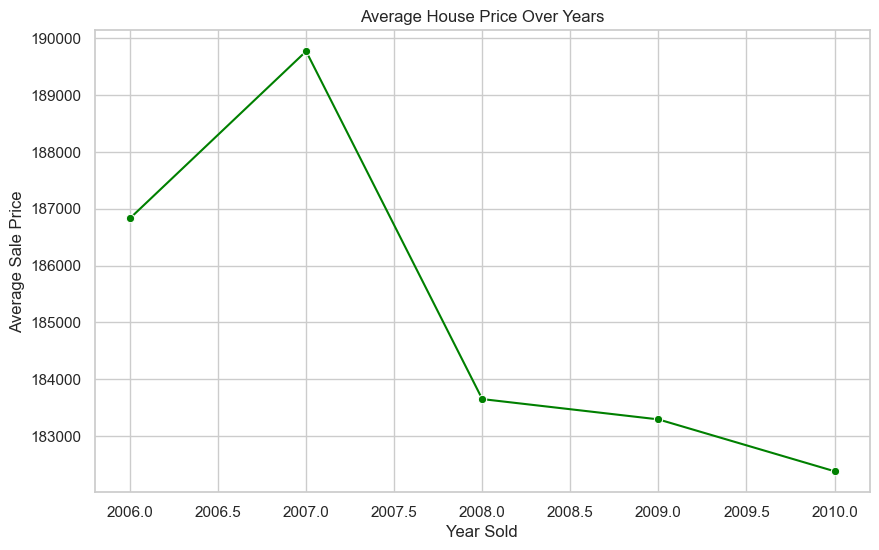

In [25]:
# Group by Year Sold and calculate average price
yearly_price = df_cleaned.groupby('YrSold')['SalePrice'].mean().reset_index()

# Line plot for yearly price trends
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_price, x='YrSold', y='SalePrice', marker='o', color='green')
plt.title('Average House Price Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()


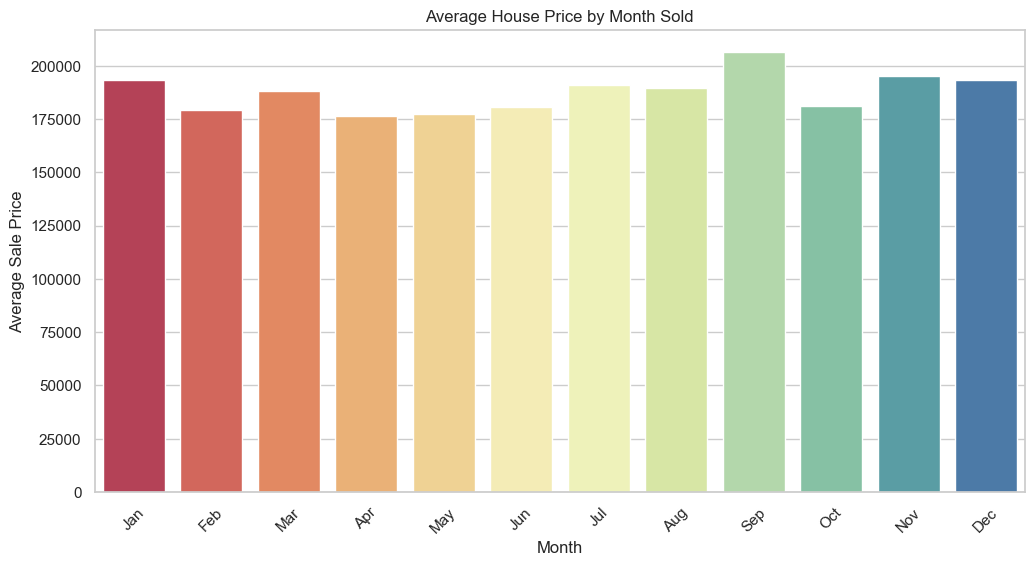

In [27]:
# Optional: Convert month names to numbers for sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_cleaned['MoSold'] = pd.Categorical(df_cleaned['MoSold'], categories=month_order, ordered=True)

# Group by Month
monthly_price = df_cleaned.groupby('MoSold')['SalePrice'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_price, x='MoSold', y='SalePrice', palette='Spectral')
plt.title('Average House Price by Month Sold')
plt.xlabel('Month')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()


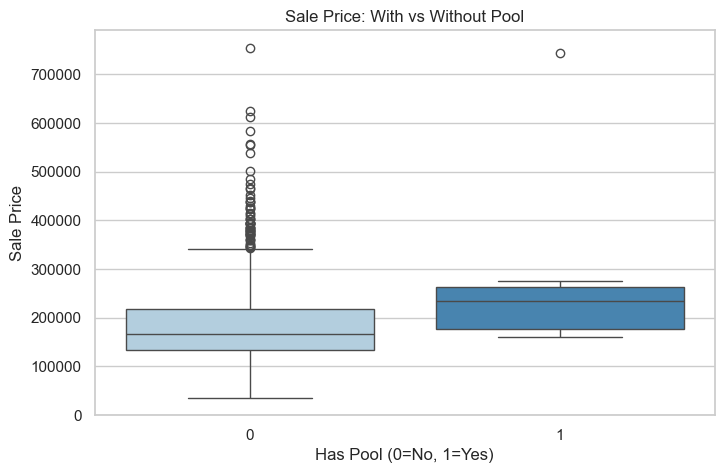

In [29]:
# Pool presence: create binary indicator (1 if PoolArea > 0, else 0)
df_cleaned['HasPool'] = df_cleaned['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Boxplot of SalePrice by Pool presence
plt.figure(figsize=(8,5))
sns.boxplot(x='HasPool', y='SalePrice', data=df_cleaned, palette='Blues')
plt.title('Sale Price: With vs Without Pool')
plt.xlabel('Has Pool (0=No, 1=Yes)')
plt.ylabel('Sale Price')
plt.show()


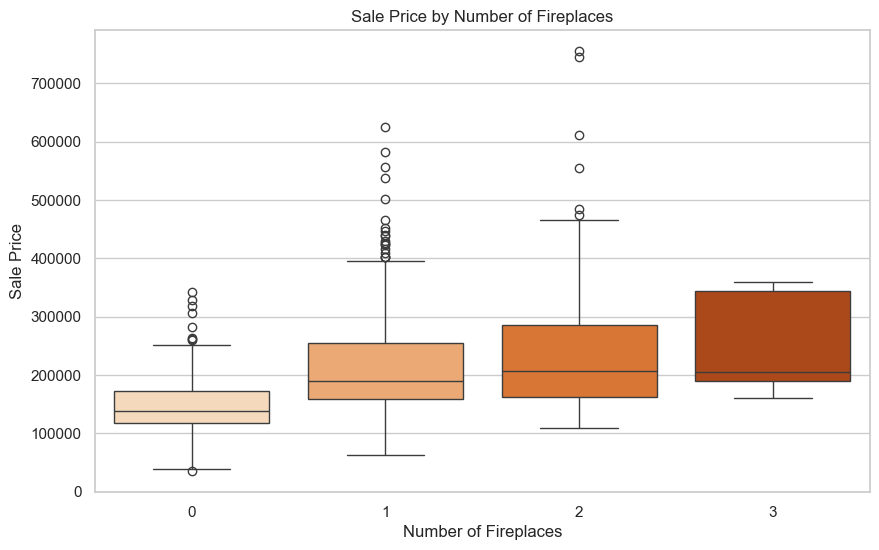

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df_cleaned, palette='Oranges')
plt.title('Sale Price by Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.show()


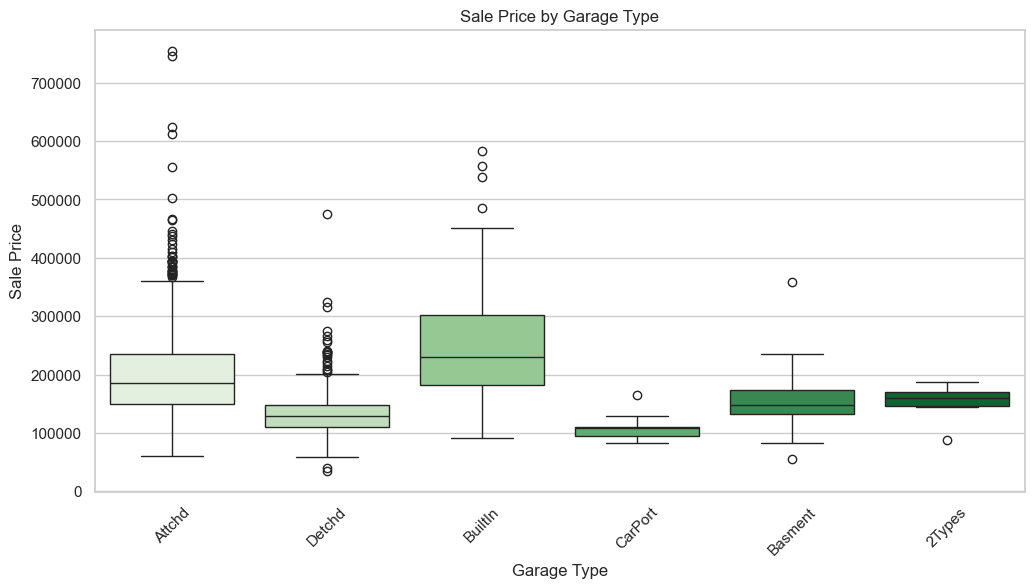

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='GarageType', y='SalePrice', data=df_cleaned, palette='Greens')
plt.title('Sale Price by Garage Type')
plt.xlabel('Garage Type')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()


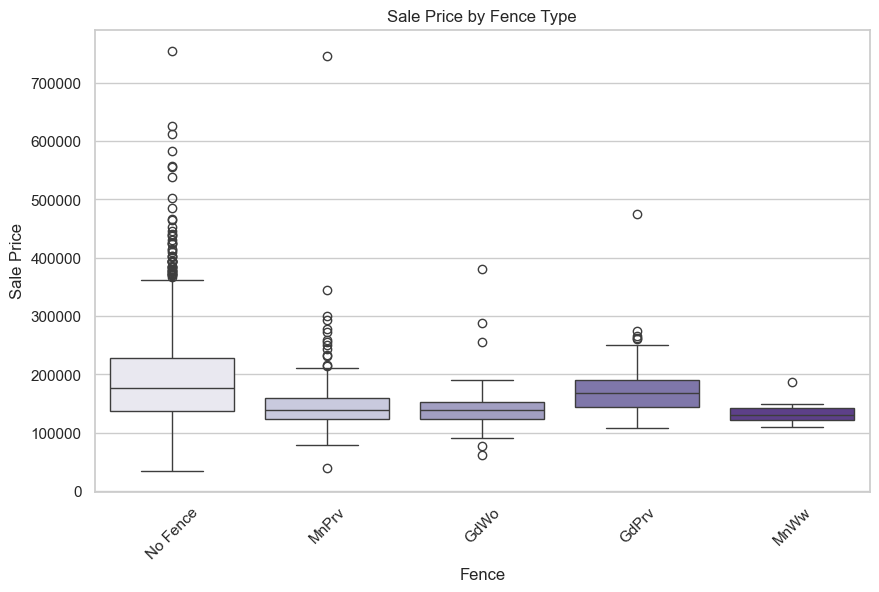

In [35]:
# Replace 'No' and NA with 'No Fence' label
df_cleaned['Fence'] = df_cleaned['Fence'].replace({'No': 'No Fence'}).fillna('No Fence')

# Boxplot of Fence vs SalePrice
plt.figure(figsize=(10,6))
sns.boxplot(x='Fence', y='SalePrice', data=df_cleaned, palette='Purples')
plt.title('Sale Price by Fence Type')
plt.xlabel('Fence')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()
